# Bayesian Blocks example with Geminga

In [1]:
%matplotlib inline
from importlib import reload
from  main import Main
import warnings
warnings.filterwarnings('error')

### Load timed data and weights for Geminga
Create 1-day binned summary, and light curve from it with Poisson fits

In [2]:
cdata = Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/geminga_weights.pkl')
lcp = cdata.light_curve( rep='poisson', min_exp=0.1) 

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Default binning: 3650 intervals of 1 days, in range (54683.0, 58333.0)
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
Loaded 3587 / 3650 cells with exposure > 0.1 for light curve analysis
Fits using representation poisson: 3587 intervals


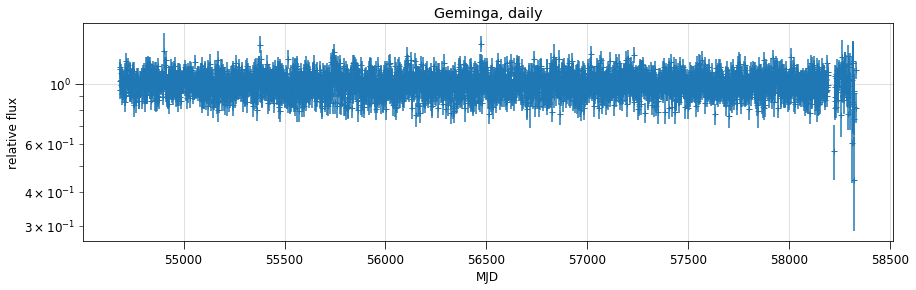

In [18]:
def plot_lc(lc, title='', **kwargs):
    fig, ax = plt.subplots(1,1, figsize=(15,4))
    lc.flux_plot(ax=ax, yscale='log', title=title, **kwargs);
plot_lc(lcp, 'Geminga, daily')

### Make Bayesian Block partitions into a light curve, here using counts only!


In [16]:
%time lcbb = cdata.bayesian_blocks( )

Partitioned 3562 cells into 13 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.CountFitness'> 
Loaded 13 / 13 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 13 intervals
CPU times: user 3.11 s, sys: 5 ms, total: 3.11 s
Wall time: 3.12 s


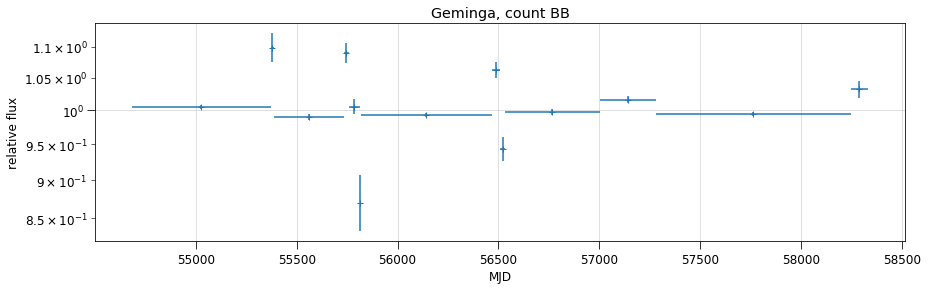

In [19]:
plot_lc(lcbb, title='Geminga, count BB')

Partitioned 3562 cells into 8 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.LikelihoodFitness'> 
Loaded 8 / 8 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 8 intervals
CPU times: user 1min 54s, sys: 64 ms, total: 1min 54s
Wall time: 1min 55s


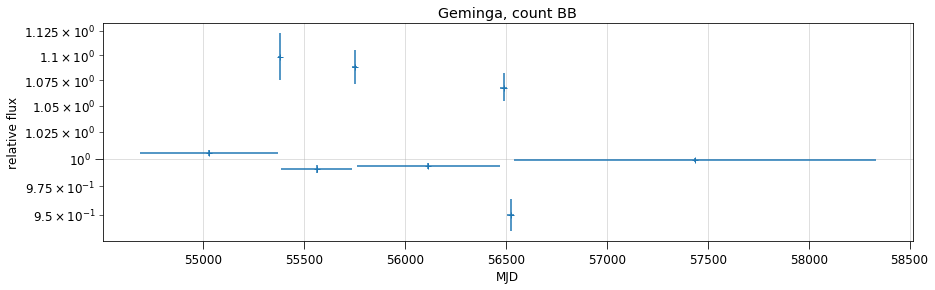

In [20]:
%time lcbbl = cdata.bayesian_blocks(fitness_func='likelihood')
plot_lc(lcbbl, title='Geminga, count BB')